# Dix Hospital Ledger data cleaning and basic descriptives

This datalab notebook describes the process of cleaning the Dix Intake Ledger, from Raleigh, North Carolina.<br>
The code was written in Stata MP v16.

# Import

In [8]:
display "Notebook generated on $S_DATE at $S_TIME ET"

Notebook generated on  2 Oct 2019 at 12:23:51 ET


In [9]:
//	Import data, recevied 16-Sep-2019 from Sarah Almond
	import delimited "Dix Ledger Deidentified.csv", clear
	describe, f

// Internal counting variable
gen counter=1
    la var counter "Equals one for each row observation"


(29 vars, 7,479 obs)


Contains data
  obs:         7,479                          
 vars:            29                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
patientid       int     %8.0g                 Patient ID
patientnumberext
                str1    %9s                   Patient Number Ext
locatedin       int     %8.0g                 Located In
occupationastranscribed
                str39   %39s      

-----

# Univariate formatting

## Dates of Admission and Discharge

In [10]:
* Admission
gen admitdate = date(dateofadmission,"YMD")
	order admitdate, a(dateofadmission)
		format admitdate %td
			la var admitdate "Date of admission (cleaned)"
				*drop dateofadmission
                
gen year = year(admitdate)
	order year, a(admitdate)
		la var year "Year of admission"
        
gen decade = .
    replace decade=1 if year>=1850 & year<=1859
    replace decade=2 if year>=1860 & year<=1869
    replace decade=3 if year>=1870 & year<=1879
    replace decade=4 if year>=1880 & year<=1889
    replace decade=5 if year>=1890 & year<=1899
    replace decade=6 if year>=1900 & year<=1909
    replace decade=7 if year>=1910 & year<=1919
    replace decade=8 if year>=1920 & year<=1929
        label define decadelabel 1 "1850s" 2 "1860s" 3 "1870s" 4 "1880s" 5 "1890s" 6 "1900s" 7 "1910s" 8 "1920s"
            label values decade decadelabel
qui tab decade, m

gen dayofweek = dow(admitdate)
    order dayofweek, a(year)
        la var dayofweek "Day of the week of admission date 0=Sunday"
            label define week 0 "Sun" 1 "Mon" 2 "Tue" 3 "Wed" 4 "Thu" 5 "Fri" 6 "Sat"
                label values dayofweek week

gen admitmonth=month(admitdate)
    order admitmonth, a(year)
        la var admitmonth "Month of admission"
            label define month 1 "J" 2 "F" 3 "M" 4 "A" 5 "M" 6 "J" 7 "J" 8 "A" 9 "S" 10 "O" 11 "N" 12 "D"
                label values admitmonth month
                
                            
* Discharge
gen disdate = date(dateofdischarge,"YMD")
	order disdate, a(admitdate)
		la var disdate "Date of discharge (cleaned)"
			format disdate %td

qui tab dayofweek, m


(31 missing values generated)




(31 missing values generated)



(7,479 missing values generated)

(340 real changes made)

(541 real changes made)

(430 real changes made)

(761 real changes made)

(1,274 real changes made)

(1,708 real changes made)

(2,393 real changes made)

(0 real changes made)




(31 missing values generated)





(31 missing values generated)





(1,254 missing values generated)






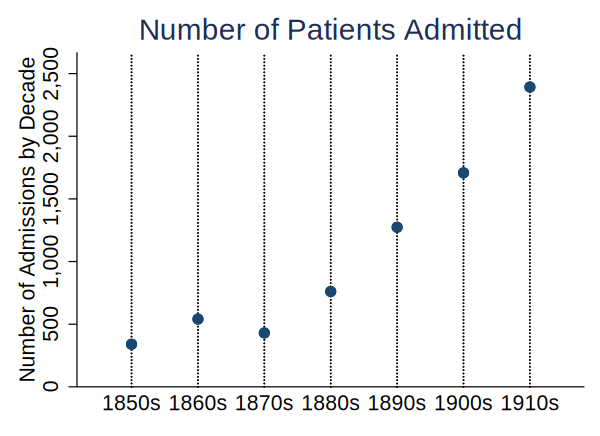






    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
         decade |          32          7,479           0.43
----------------+-----------------------------------------------


In [11]:
graph dot (sum) counter, over(decade) vertical title("Number of Patients Admitted") ytitle("Number of Admissions by Decade") graphregion(color(white)) bgcolor(white) scale(1.4)
mdesc decade

The number of patients started to climb in the 1880s and increased substantially for the next decades.

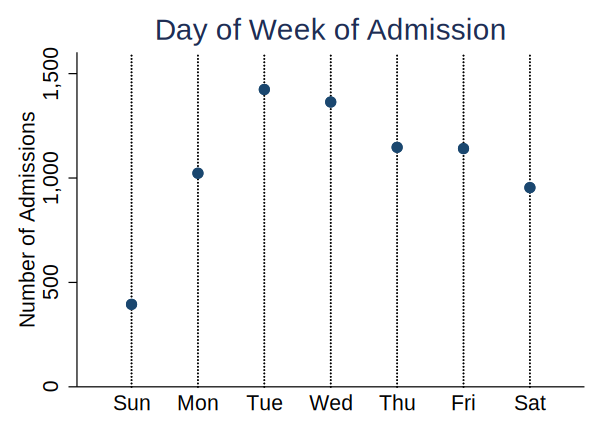






    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
      dayofweek |          31          7,479           0.41
----------------+-----------------------------------------------


In [12]:
graph dot (sum) counter, over(dayofweek) vertical title("Day of Week of Admission") ytitle("Number of Admissions") graphregion(color(white)) bgcolor(white) scale(1.4)
mdesc dayofweek

Admissions peaked on Tuesdays and were lowest on Sunday. <br>

------

<br>

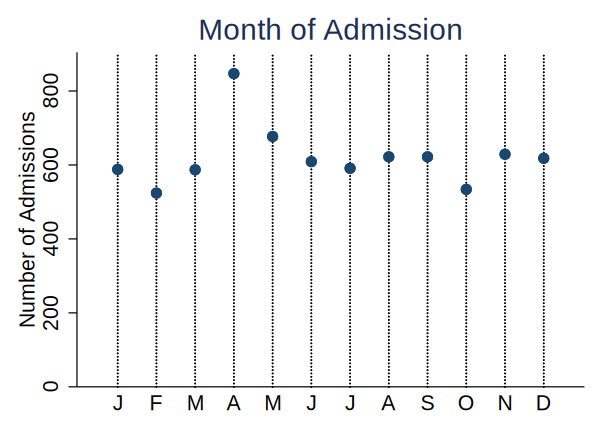






    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
      dayofweek |          31          7,479           0.41
----------------+-----------------------------------------------


In [13]:
graph dot (sum) counter, over(admitmonth) vertical title("Month of Admission") ytitle("Number of Admissions") graphregion(color(white)) bgcolor(white) scale(1.4)
mdesc dayofweek

April was the month with the most admissions.<br>
<br>

-----

<br>

## Age




(8 real changes made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)


age: all characters numeric; replaced as double
(248 missing values generated)


    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
            age |         248          7,479           3.32
----------------+-----------------------------------------------



(bin=18, start=0, width=5)


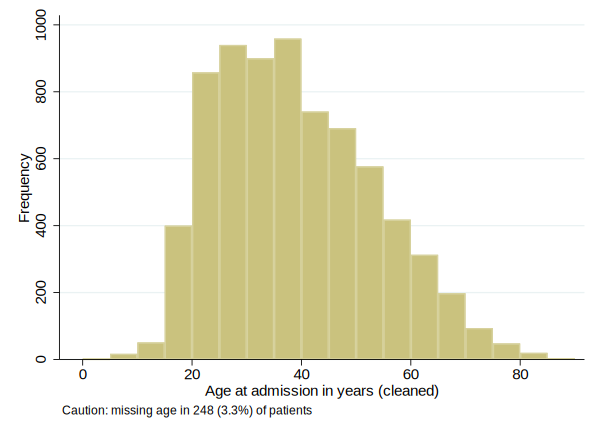

In [14]:
qui tab age, m
la var age "Age at admission in years (cleaned)"

* missing
replace age="" if regexm(lower(age),"unk")
	replace age="" if age=="?"

* pick median of literal age ranges
replace age = "33" if age=="30-35?"
replace age = "43" if age=="45 or 50"
replace age = "43" if age=="45-50"
replace age = "45" if age=="4_"
replace age = "58" if age=="55 or 60"
replace age = "73" if age=="70-5"

* fraction to decimal and trim extra characters
replace age = regexr(age," 1/2", ".5")
replace age = regexr(age,"\+", "")
replace age = regexr(age,"(\?)", "")

replace age = "35" if age=="About 35"
replace age = "58" if age=="58 ()"

qui tab age, m

* convert to numeric
destring age, replace

* Check for missing data
mdesc age
local miss=r(miss)
local pct=round(r(percent),1.1)

* Age at intake histogram
hist age, width(5) freq graphregion(color(white)) bgcolor(white) note("Caution: missing age in `miss' (`pct'%) of patients")

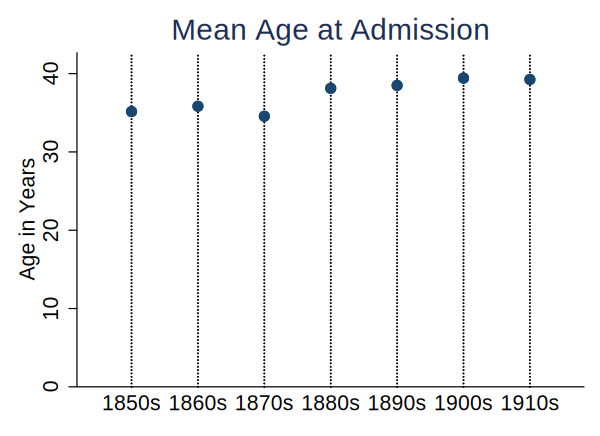

In [15]:
graph dot (mean) age, over(decade) vertical title("Mean Age at Admission") ytitle("Age in Years") graphregion(color(white)) bgcolor(white) scale(1.4)

In [16]:
qui bysort decade: summ age

Mean age at admission rose slightly beyond in the 1880s, from 35 to 39 years, as the overall population of the hospital increased.<br>

-----

<br>

## Marital status

In [17]:
gen marital = .
	quietly replace marital = 1 if maritalstatus=="Single"
	quietly replace marital = 2 if maritalstatus=="Married"
	quietly replace marital = 2 if maritalstatus=="Single;Married"
	quietly replace marital = 3 if maritalstatus=="Widowed"
	quietly replace marital = 3 if maritalstatus=="Married; Widowed"
	quietly replace marital = 4 if maritalstatus=="Divorced"
	quietly replace marital = 4 if maritalstatus=="Separated"
	quietly replace marital = 9 if maritalstatus==""
	quietly replace marital = 9 if maritalstatus=="unknown"
	quietly replace marital = 9 if marital==.
		la var marital "Marital status at admission (recoded)"
			label define marlabel 1 "Single" 2 "Married" 3 "Widowed" 4 "Separated or Divorced" 9 "Unknown"
				label values marital marlabel


(7,479 missing values generated)















In [18]:
replace marital=. if marital==9
* Check for missing data
tab marital, m
mdesc marital


(185 real changes made, 185 to missing)


    Marital status at |
  admission (recoded) |      Freq.     Percent        Cum.
----------------------+-----------------------------------
               Single |      3,224       43.11       43.11
              Married |      3,380       45.19       88.30
              Widowed |        685        9.16       97.46
Separated or Divorced |          5        0.07       97.53
                    . |        185        2.47      100.00
----------------------+-----------------------------------
                Total |      7,479      100.00


    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
        marital |         185          7,479           2.47
----------------+-----------------------------------------------


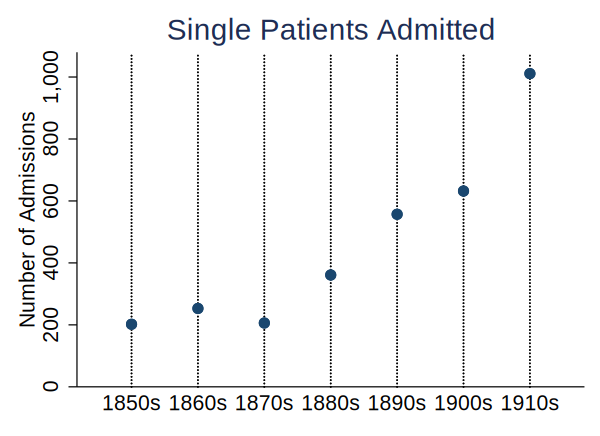

In [19]:
graph dot (sum) counter if marital==1, over(decade) vertical title("Single Patients Admitted") ytitle("Number of Admissions") graphregion(color(white)) bgcolor(white) scale(1.4)

The number of single patients increased as the overall population of the hospital increased.<br>

-----

<br>

## Gender

In [20]:
tab gender, m


     gender |      Freq.     Percent        Cum.
------------+-----------------------------------
            |        123        1.64        1.64
          F |      3,525       47.13       48.78
          M |      3,831       51.22      100.00
------------+-----------------------------------
      Total |      7,479      100.00


In [21]:
* Check for missing data
mdesc gender


    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
         gender |         123          7,479           1.64
----------------+-----------------------------------------------


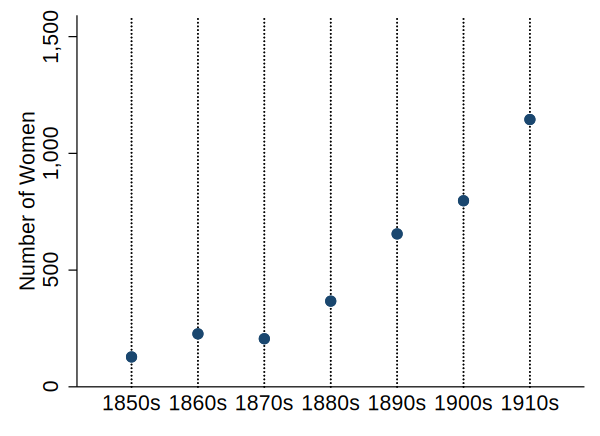

In [22]:
graph dot (sum) counter if gender=="F", over(decade) vertical ytitle("Number of Women") graphregion(color(white)) bgcolor(white) scale(1.4)

Should repeat analysis as proportion of women over time. <br>

-----

<br>

## Length of Stay

Analysis to be done after variable cleanup

## Occupation

### Farming

In [23]:
gen farmer = regexm(occupationcleaned, "farm")
	la var farmer "infer farmer occupation"
		note farmer: regex from occupationcleaned = farm


In [24]:
 table year, c(sum farmer) col


-----------------------
Year of   |
admission | sum(farmer)
----------+------------
     1856 |          32
     1857 |          14
     1858 |          10
     1859 |           5
     1860 |           8
     1861 |           1
     1862 |           0
     1863 |           0
     1864 |           0
     1865 |           0
     1866 |           0
     1867 |           0
     1868 |           0
     1869 |           0
     1870 |           0
     1871 |           0
     1872 |           0
     1873 |           0
     1874 |           0
     1875 |           0
     1876 |           0
     1877 |           0
     1878 |           0
     1879 |           0
     1880 |           0
     1881 |           0
     1882 |           0
     1883 |           9
     1884 |           3
     1885 |          42
     1886 |          50
     1887 |          39
     1888 |          27
     1889 |          24
     1890 |          24
     1891 |          27
     1892 |          23
     1893 |          23
   

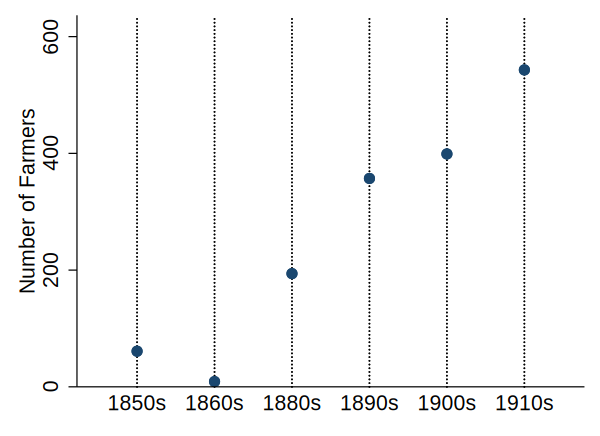

In [25]:
graph dot (sum) counter if farmer==1, over(decade) vertical ytitle("Number of Farmers") graphregion(color(white)) bgcolor(white) scale(1.4)

Repeat as proportion. From 1859-84 there were nearly no farmers recorded... ? Between 1908 (n=38) to 1909 (n=82) the number of farmers increased -- was there a facility expansion at the time? Check trends in general patient population. <br>

----

<br>

### Health Professionals

In [26]:
gen healthpro = regexm(occupationcleaned, "doct|pharm|nurse|surg|physician|dentist")
	la var healthpro "inferred health professional occupation" 
		note healthpro: regex from occupationcleaned = doct|pharm|nurse|surg|physician|dentist

qui table year, c(sum healthpro) col

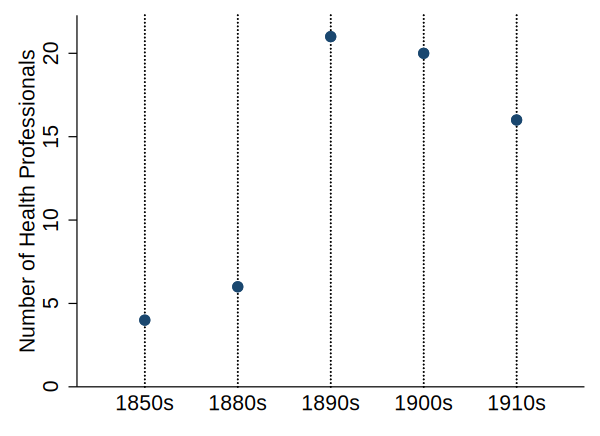

In [27]:
graph dot (sum) counter if healthpro==1, over(decade) vertical ytitle("Number of Health Professionals") graphregion(color(white)) bgcolor(white) scale(1.4)

## Final Disposition

In [28]:
* Flag for death
	gen dead = regexm(lower(finalcondition),"die|dead")
		order dead, b(finalcondition)
			la var dead "Infer dead"
* Flag for better as improved or cured
	gen better = regexm(lower(finalcondition),"die|dead")
		order better, b(finalcondition)
* Transferred to other facilities
	gen transfer = regexm(lower(remarksfreetext),"w.n.c|western|transf|sent")
* Suicide flag
	gen suicide = regexm(lower(remarksfreetext), "suicide")
* Pellagra flag
	gen pellagra = regexm(lower(remarksfreetext), "pellagra")

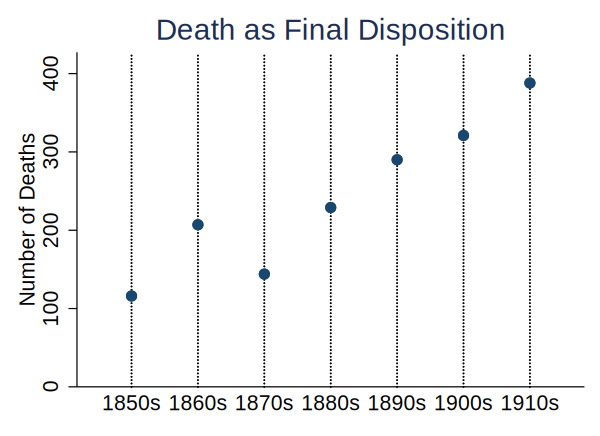

In [29]:
graph dot (sum) counter if dead==1, over(decade) vertical title("Death as Final Disposition") ytitle("Number of Deaths") graphregion(color(white)) bgcolor(white) scale(1.4)

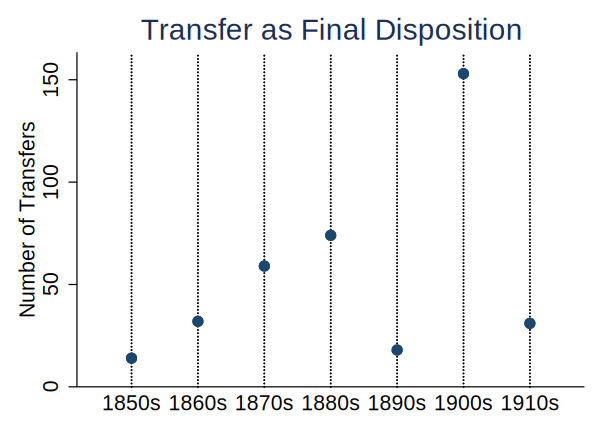

In [30]:
graph dot (sum) counter if transfer==1, over(decade) vertical title("Transfer as Final Disposition") ytitle("Number of Transfers") graphregion(color(white)) bgcolor(white) scale(1.4)

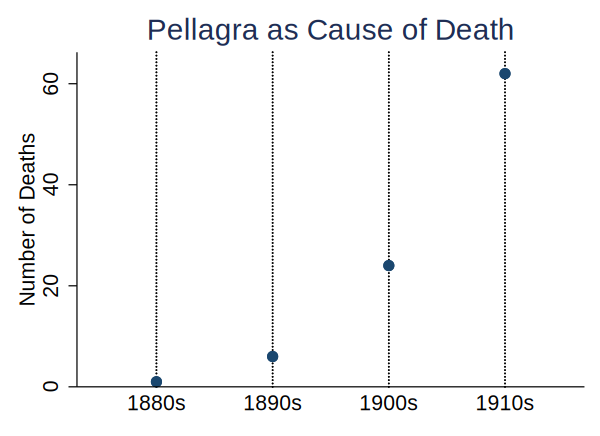

In [31]:
graph dot (sum) counter if pellagra==1, over(decade) vertical title("Pellagra as Cause of Death") ytitle("Number of Deaths") graphregion(color(white)) bgcolor(white) scale(1.4)

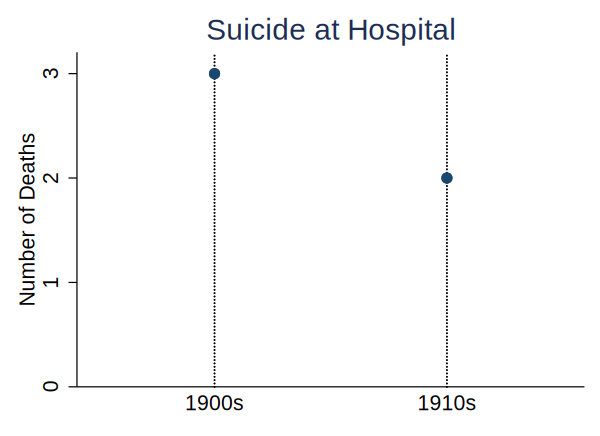

In [32]:
graph dot (sum) counter if suicide==1, over(decade) vertical title("Suicide at Hospital") ytitle("Number of Deaths") graphregion(color(white)) bgcolor(white) scale(1.4)

# Bivariate Analysis

## Age and Gender

In [33]:
bysort gender: summarize age
qui distinct patientid if age==. | gender==""
local miss= r(ndistinct)



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> gender = 

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |         77    42.06494    14.54425         16         75

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> gender = F

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |      3,438    37.83406    13.43668          5         90

-----------------------

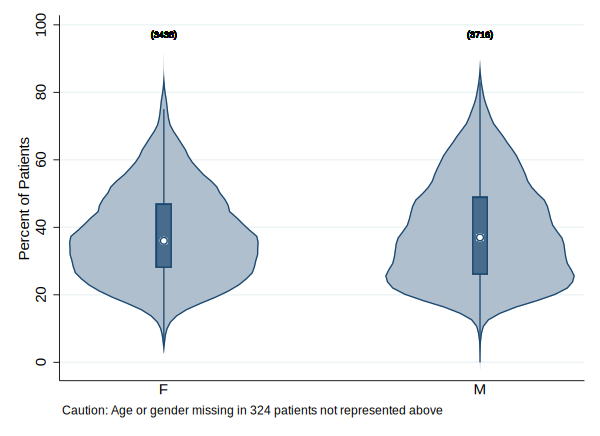

In [34]:
vioplot age, over(gender) ytitle("Percent of Patients") obs(alt) graphregion(color(white)) bgcolor(white) note("Caution: Age or gender missing in `miss' patients not represented above")

Intrepretation: Female patients at entry were clustered around mid-30s of age, while males tended to be a decade younger but also extending into later age.

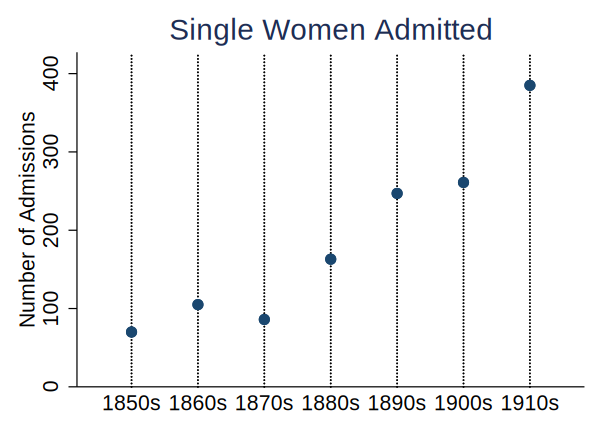

In [36]:
graph dot (sum) counter if marital==1 & gender=="F", over(decade) vertical title("Single Women Admitted") ytitle("Number of Admissions") graphregion(color(white)) bgcolor(white) scale(1.4)

Need to adjust for increse in total patient population.